## basics of tensor flow

In [7]:
import tensorflow as tf
x1=tf.constant(5)
x2=tf.constant(6)

result=x1*x2
tf.compat.v1.disable_eager_execution()
sess=tf.compat.v1.Session()
print(sess.run(result))

30


In [8]:
tf.compat.v1.disable_eager_execution()
sesp=tf.compat.v1.Session()
print(sesp.run(result))
sess.close()


30


In [9]:
tf.compat.v1.disable_eager_execution()
with tf.compat.v1.Session() as soss:
    print(soss.run(result))


30


## Part 2

#### function is

#### inputs >>weights >> hiden_layer1()Activation function >>weights >>hidden_layer2(activationfunction)>> output layer
#### compare output layer intended outputs,>> cost function(cross entropy)
#### optimization/ optimizer to minmise the cost(sgd,adamoptimizer,.......adagard)
#### backpropagation
#### feed forward+backprop= epoch

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [15]:
fashion_data=keras.datasets.fashion_mnist
print(fashion_data)

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [16]:
type(fashion_data)

module

In [17]:
(train_data,train_labels),(test_data,test_labels)=fashion_data.load_data()

In [18]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [19]:
train_labels # labels are from 0 to 9 and no.of classes are 10

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

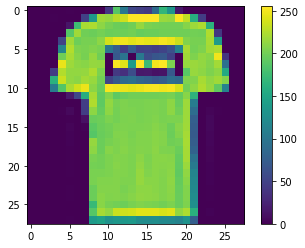

(28, 28)


In [20]:
plt.figure()
plt.imshow(train_data[1])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_data[1].shape)

In [21]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model.
#To do so, divide the values by 255. 
#it's important that the training set and the testing set be preprocessed in the same way:

train_data=train_data/255.0
test_data=test_data/255.0


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

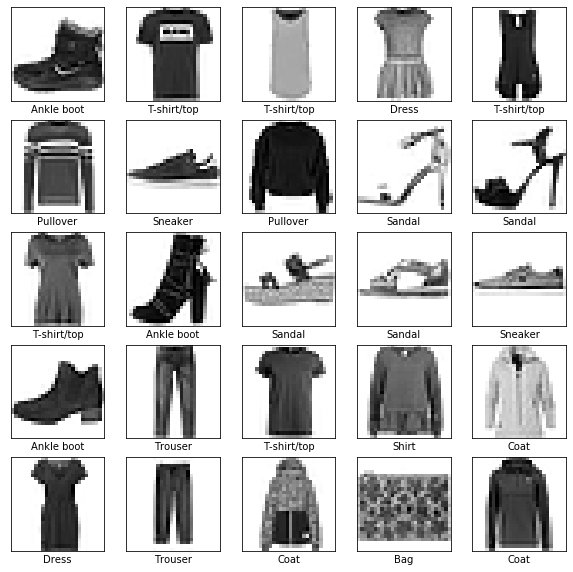

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])
    

plt.show()

   

Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [24]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(10)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [26]:
model.fit(train_data,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5010 - accuracy: 0.8231
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3758 - accuracy: 0.8649
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3403 - accuracy: 0.8759
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3151 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2949 - accuracy: 0.8926
Epoch 6/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2819 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2689 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2572 - accuracy: 0.9056
Epoch 9/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2481 - accuracy: 0.90 - 6s 103us/samp

In [30]:
train_loss,train_acc=model.evaluate(train_data,train_labels,verbose=2)
print(train_loss,train_acc)

0.21708354708949726 0.91868335


In [31]:
test_acc,test_los=model.evaluate(test_data,test_labels,verbose=1)
print(test_acc,test_los)


0.326086281812191 0.884


In [32]:
probability_m=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_m.predict(test_data)
print(predictions)
print(predictions.shape)

[[3.5240887e-06 7.7313533e-09 6.9549742e-08 ... 1.8675305e-03
  9.4236048e-06 9.9802256e-01]
 [9.5255173e-06 6.1906623e-14 9.9637270e-01 ... 3.4280169e-13
  2.5218754e-11 4.4918031e-11]
 [2.4538567e-08 1.0000000e+00 8.3331203e-10 ... 6.6462696e-20
  3.1717094e-14 8.7673421e-19]
 ...
 [5.1231962e-07 6.3217391e-12 3.5946221e-07 ... 4.3608561e-11
  9.9994910e-01 1.6349350e-14]
 [1.1506967e-08 9.9998319e-01 3.8875406e-08 ... 1.3899183e-15
  2.2081601e-09 9.3541467e-14]
 [5.1076036e-05 1.5851894e-08 2.5446207e-05 ... 1.5140974e-03
  1.3406838e-04 2.8926665e-06]]
(10000, 10)


In [33]:
predictions[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
np.argmax(predictions[0])

9

In [35]:
print(test_labels[0])
class_names[test_labels[0]]

9


'Ankle boot'

#### So, the model is most confident that this image is an ankle boot, or class_names[9].
#### Examining the test label shows that this classification is correct:

3
Dress


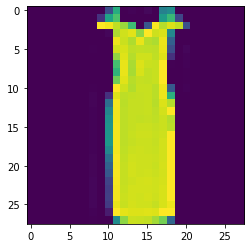

In [36]:
k=4444
p=predictions[k]
print(np.argmax(p))
print(class_names[test_labels[k]])
plt.imshow(test_data[k])

## Graph this to look at the full set of 10 class predictions.

In [70]:
import matplotlib.pyplot as plt
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [71]:
x=[1,1,1,1,1]
print(np.exp(x)/np.sum(np.exp(x)))
    

[0.2 0.2 0.2 0.2 0.2]


In [74]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot=plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim=([0,1])
    predicted_label=np.argmax(predictions_array)
    
    this_plot[predicted_label].color='red'
    this_plot[true_label].color='blue'

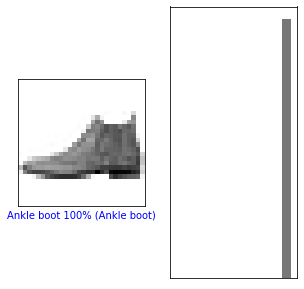

In [75]:
i=0
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


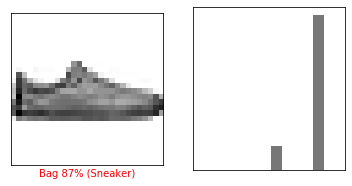

In [77]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

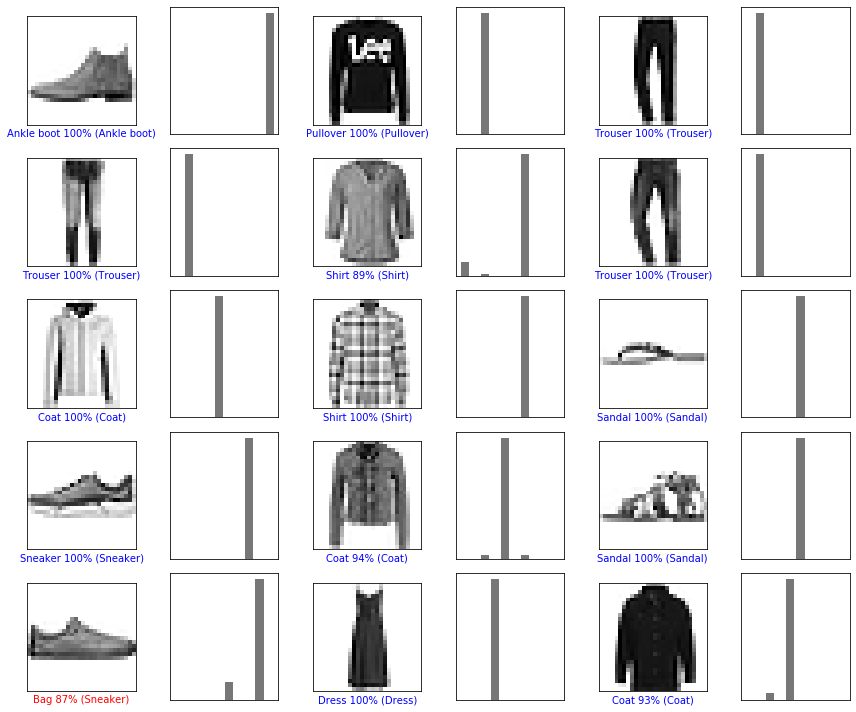

In [80]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_data)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
plt.show()

In [84]:
img = test_data[1]

print(img.shape)
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [86]:
predictions_single = probability_m.predict(img)

print(predictions_single)

[[9.5255173e-06 6.1906860e-14 9.9637270e-01 4.1754808e-11 1.8954807e-03
  6.7603765e-12 1.7224208e-03 3.4280299e-13 2.5218752e-11 4.4918201e-11]]


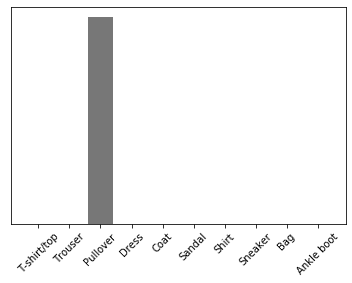

In [87]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

This notebook classifies movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

The tutorial demonstrates the basic application of transfer learning with TensorFlow Hub and Keras.

We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

This notebook uses tf.keras, a high-level API to build and train models in TensorFlow, and TensorFlow Hub, a library and platform for transfer learning. For a more advanced text classification tutorial using tf.keras, see the MLCC Text Classification Guide.

In [2]:
import numpy as np
import tensorflow as tf
!pip install -q tensorflow-hub
!pip install -q tfds-nightly

In [5]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [10]:
print('eager mode',tf.executing_eagerly())
print('hub',hub.__version__)
print('gpu is','available '  if tf.config.experimental.list_physical_devices else 'not vailable')

eager mode True
hub 0.8.0
gpu is available 


#### Download the IMDB dataset

In [21]:
train_data,validation_data,test_data,=tfds.load( name='imdb_reviews',split=('train[:60%]','train[60%:]','test'),
as_supervised=True)

Let's take a moment to understand the format of the data. Each example is a sentence representing the movie review and a corresponding label. The sentence is not preprocessed in any way. The label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

Let's print first 10 examples.

In [28]:
train_examples_batch,train_labels_batch=next(iter(train_data.batch(5)))
train_examples_batch

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [29]:
train_labels_batch

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 1, 1], dtype=int64)>

In [108]:
test_examples_batch,test_labels_batch=next(iter(test_data.batch(10)))
print(test_labels_batch)

tf.Tensor([1 1 0 0 1 1 1 1 0 1], shape=(10,), dtype=int64)


## Build the model

In [32]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer=hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)

In [35]:
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [43]:
dsf=np.array(['hello world'])
hub_layer(dsf)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 0.5444714 ,  0.04999202,  0.72879404, -0.8718245 , -0.99750406,
         0.43162706, -0.3737911 , -0.03111676,  0.7998788 , -0.3266913 ,
        -0.7445055 ,  0.29758966,  0.19830623,  0.09417707, -0.73332936,
         0.02078569,  1.1150572 ,  0.6040974 , -1.0682695 , -0.42282778]],
      dtype=float32)>

In [49]:
model=tf.keras.Sequential([])

In [72]:
model=tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 435,861
Trainable params: 435,861
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics='accuracy')

In [125]:
histry_data=model.fit(train_data.shuffle(1000).batch(64),validation_data=validation_data.batch(512),verbose=1,epochs=10)

Epoch 1/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.9818 - val_accuracy: 0.8552
Epoch 2/10
235/235 [==============================] - 9s 38ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 1.0764 - val_accuracy: 0.8487
Epoch 3/10
235/235 [==============================] - 9s 38ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 1.1351 - val_accuracy: 0.8524
Epoch 4/10
235/235 [==============================] - 9s 37ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 1.1746 - val_accuracy: 0.8531
Epoch 5/10
235/235 [==============================] - 9s 38ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 1.4133 - val_accuracy: 0.8493
Epoch 6/10
235/235 [==============================] - 9s 37ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.4291 - val_accuracy: 0.8544
Epoch 7/10
235/235 [==============================] - 9s 37ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 1.4926 - val_accuracy: 0.8540

In [79]:
results=model.evaluate(test_data.batch(64),verbose=2)

391/391 - 5s - loss: 0.9621 - accuracy: 0.8401


In [64]:
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.412
accuracy: 0.792


In [117]:
probabilty_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
pred=probabilty_model.predict(test_examples_batch)

In [124]:
pred[4]


array([1.], dtype=float32)

In [105]:
next(iter(test_data.batch(1)))

(<tf.Tensor: shape=(1,), dtype=string, numpy=
 array([b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."],
 

In [112]:
test_examples_batch,test_labels_batch=next(iter(test_data.batch(10)))
print(test_labels_batch)

tf.Tensor([1 1 0 0 1 1 1 1 0 1], shape=(10,), dtype=int64)
